In [1]:

# Import libraries
import keras
from keras.models import Sequential,Model,load_model
from keras.optimizers import SGD
from keras.layers import BatchNormalization, Lambda, Input, Dense, Convolution2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D, Dropout, Flatten, merge, Reshape, Activation
from keras.layers.merge import Concatenate
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import keras.backend as K
import tensorflow as tf

import numpy as np

import glob
import os
from os import sys
import itertools

import cv2

import sklearn
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline


D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Print library version

#python version

print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

#sklearn version
print('scikit-learn version is {}.'.format(sklearn.__version__))

#tensorflow version
print('tensorflow version is {}.'.format(tf.__version__))

#keras version
print('keras version is {}.'.format(keras.__version__))

#numpy version
print('numpy version is {}.'.format(np.__version__))

#opencv version
print('opencv version is {}.'.format(cv2.__version__))

Python version
3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Version info.
sys.version_info(major=3, minor=6, micro=5, releaselevel='final', serial=0)
scikit-learn version is 0.19.1.
tensorflow version is 1.13.1.
keras version is 2.3.1.
numpy version is 1.14.3.
opencv version is 4.2.0.


In [3]:
#define parameters

img_rows , img_cols = 227,227
num_classes = 3
batch_size = 32
nb_epoch = 2 # 5


# initialize label names for the dataset

labelNames = ["general_waste","green_sack", "mixed_recycling"]
classes = np.asarray([0, 1, 2])




In [4]:
#create train test dataset

base_dir = '/'

train_dir = os.path.join(base_dir, 'train')

validation_dir = os.path.join(base_dir, 'test')

eval_dir = os.path.join(base_dir, 'eval')

In [5]:
#create train dataset

trainX=np.zeros((1,227,227,3))
trainy=[]

paths=glob.glob(os.path.join('train/general_waste','*.jpg'))


for path in paths:
        print(path)
        im=cv2.resize (cv2.imread(path), (227,227)).astype(np.float32) 
        im=im.reshape(1, 227, 227, 3)
        trainX=np.vstack((trainX, im))
        trainy.append(0)

print(str(trainX.shape))
trainX = np.delete(trainX, 0, axis=0)

print(str(trainX.shape))
#print(str(trainX))

paths=glob.glob(os.path.join('train/green_sack','*.jpg'))


for path in paths:
        print(path)
        im=cv2.resize (cv2.imread(path), (227,227)).astype(np.float32) 
        im=im.reshape(1, 227, 227, 3)
        trainX=np.vstack((trainX, im))
        trainy.append(1)

paths=glob.glob(os.path.join('train/mixed_recycling','*.jpg'))


for path in paths:
        print(path)
        im=cv2.resize (cv2.imread(path), (227,227)).astype(np.float32) 
        im=im.reshape(1, 227, 227, 3)
        trainX=np.vstack((trainX, im))
        trainy.append(2)


print('trainX.shape') 
print(str(trainX.shape))  

trainy = np.array(trainy)

print(str(trainy.shape)) 

trainy = np.expand_dims(trainy, axis=1)

print('trainy.shape') 
print(str(trainy.shape)) 



train/general_waste\0.jpg
train/general_waste\1.jpg
train/general_waste\12.jpg
train/general_waste\18.jpg
train/general_waste\19.jpg
train/general_waste\2.jpg
train/general_waste\20.jpg
train/general_waste\21.jpg
train/general_waste\22.jpg
train/general_waste\23.jpg
train/general_waste\24.jpg
train/general_waste\25.jpg
train/general_waste\26.jpg
train/general_waste\26_cr.jpg
train/general_waste\27.jpg
train/general_waste\28.jpg
train/general_waste\29.jpg
train/general_waste\3.jpg
train/general_waste\30.jpg
train/general_waste\31.jpg
train/general_waste\32.jpg
train/general_waste\33.jpg
train/general_waste\34.jpg
train/general_waste\35.jpg
train/general_waste\4.jpg
train/general_waste\41.jpg
train/general_waste\47.jpg
train/general_waste\48.jpg
train/general_waste\49.jpg
train/general_waste\5.jpg
train/general_waste\50.jpg
train/general_waste\6.jpg
(33, 227, 227, 3)
(32, 227, 227, 3)
train/green_sack\0.jpg
train/green_sack\1.jpg
train/green_sack\12.jpg
train/green_sack\18.jpg
train/gree

In [6]:
# create validation data

testX=np.zeros((1,227,227,3))
testy=[]

paths=glob.glob(os.path.join('test/general_waste','*.jpg'))


for path in paths:
        print(path)
        im=cv2.resize (cv2.imread(path), (227,227)).astype(np.float32) 
        im=im.reshape(1, 227, 227, 3)
        testX=np.vstack((testX, im))
        testy.append(0)


print(str(testX.shape))
#print(str(trainy.shape))
#print(str(testX))

testX = np.delete(testX, 0, axis=0)
print(str(testX.shape))


paths=glob.glob(os.path.join('test/green_sack','*.jpg'))


for path in paths:
        print(path)
        im=cv2.resize (cv2.imread(path), (227,227)).astype(np.float32) 
        im=im.reshape(1, 227, 227, 3)
        testX=np.vstack((testX, im))
        testy.append(1)

print(str(testX.shape))


paths=glob.glob(os.path.join('test/mixed_recycling','*.jpg'))


for path in paths:
        print(path)
        im=cv2.resize (cv2.imread(path), (227,227)).astype(np.float32)  
        im=im.reshape(1, 227, 227, 3)
        testX=np.vstack((testX, im))
        testy.append(2)


print(str(testX.shape))
#print(str(testX))

testy = np.array(testy)
testy = np.expand_dims(testy, axis=1)

print(str(testy.shape)) 



test/general_waste\36.jpg
test/general_waste\37.jpg
test/general_waste\38.jpg
test/general_waste\39.jpg
test/general_waste\40.jpg
test/general_waste\42.jpg
test/general_waste\43.jpg
test/general_waste\44.jpg
test/general_waste\45.jpg
test/general_waste\46.jpg
(11, 227, 227, 3)
(10, 227, 227, 3)
test/green_sack\31.jpg
test/green_sack\32.jpg
test/green_sack\33.jpg
test/green_sack\34.jpg
test/green_sack\35.jpg
test/green_sack\37.jpg
test/green_sack\38.jpg
test/green_sack\39.jpg
test/green_sack\40.jpg
test/green_sack\41.jpg
(20, 227, 227, 3)
test/mixed_recycling\41.jpg
test/mixed_recycling\42.jpg
test/mixed_recycling\43.jpg
test/mixed_recycling\44.jpg
test/mixed_recycling\45.jpg
test/mixed_recycling\46.jpg
test/mixed_recycling\47.jpg
test/mixed_recycling\48.jpg
test/mixed_recycling\49.jpg
test/mixed_recycling\50.jpg
(30, 227, 227, 3)
(30, 1)


In [7]:


# convert the labels from integers to vectors
lb = LabelBinarizer()
trainy = lb.fit_transform(trainy)
testy = lb.transform(testy)

# initialize the label names for the dataset
labelNames = ["general_waste", "green_sack", "mixed_recycling"]





In [8]:
#define model for bin bags classification

def color_net(num_classes):
    # placeholder for input image
    input_image = Input(shape=(227,227,3))

    # ============================================= TOP BRANCH ===================================================
    # first top convolution layer

    top_conv1 = Convolution2D(filters=48,kernel_size=(11,11),strides=(4,4),
                              input_shape=(224,224,3),activation='relu')(input_image)


    top_conv1 = BatchNormalization()(top_conv1)
    top_conv1 = MaxPooling2D(pool_size=(3,3),strides=(2,2))(top_conv1)

    # second top convolution layer
    # split feature map by half
    top_top_conv2 = Lambda(lambda x : x[:,:,:,:24])(top_conv1)
    top_bot_conv2 = Lambda(lambda x : x[:,:,:,24:])(top_conv1)

    top_top_conv2 = Convolution2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(top_top_conv2)
    top_top_conv2 = BatchNormalization()(top_top_conv2)
    top_top_conv2 = MaxPooling2D(pool_size=(3,3),strides=(2,2))(top_top_conv2)

    top_bot_conv2 = Convolution2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(top_bot_conv2)
    top_bot_conv2 = BatchNormalization()(top_bot_conv2)
    top_bot_conv2 = MaxPooling2D(pool_size=(3,3),strides=(2,2))(top_bot_conv2)

    # third top convolution layer
    # concat 2 feature map
    top_conv3 = Concatenate()([top_top_conv2,top_bot_conv2])
    top_conv3 = Convolution2D(filters=192,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(top_conv3)

    # fourth top convolution layer
    # split feature map by half
    top_top_conv4 = Lambda(lambda x : x[:,:,:,:96])(top_conv3)
    top_bot_conv4 = Lambda(lambda x : x[:,:,:,96:])(top_conv3)

    top_top_conv4 = Convolution2D(filters=96,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(top_top_conv4)
    top_bot_conv4 = Convolution2D(filters=96,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(top_bot_conv4)

    # fifth top convolution layer
    top_top_conv5 = Convolution2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(top_top_conv4)
    top_top_conv5 = MaxPooling2D(pool_size=(3,3),strides=(2,2))(top_top_conv5) 

    top_bot_conv5 = Convolution2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(top_bot_conv4)
    top_bot_conv5 = MaxPooling2D(pool_size=(3,3),strides=(2,2))(top_bot_conv5)

    # ============================================= TOP BOTTOM ===================================================
    # first bottom convolution layer
    bottom_conv1 = Convolution2D(filters=48,kernel_size=(11,11),strides=(4,4),
                              input_shape=(227,227,3),activation='relu')(input_image)
    bottom_conv1 = BatchNormalization()(bottom_conv1)
    bottom_conv1 = MaxPooling2D(pool_size=(3,3),strides=(2,2))(bottom_conv1)

    # second bottom convolution layer
    # split feature map by half
    bottom_top_conv2 = Lambda(lambda x : x[:,:,:,:24])(bottom_conv1)
    bottom_bot_conv2 = Lambda(lambda x : x[:,:,:,24:])(bottom_conv1)

    bottom_top_conv2 = Convolution2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(bottom_top_conv2)
    bottom_top_conv2 = BatchNormalization()(bottom_top_conv2)
    bottom_top_conv2 = MaxPooling2D(pool_size=(3,3),strides=(2,2))(bottom_top_conv2)

    bottom_bot_conv2 = Convolution2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(bottom_bot_conv2)
    bottom_bot_conv2 = BatchNormalization()(bottom_bot_conv2)
    bottom_bot_conv2 = MaxPooling2D(pool_size=(3,3),strides=(2,2))(bottom_bot_conv2)

    # third bottom convolution layer
    # concat 2 feature map
    bottom_conv3 = Concatenate()([bottom_top_conv2,bottom_bot_conv2])
    bottom_conv3 = Convolution2D(filters=192,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(bottom_conv3)

    # fourth bottom convolution layer
    # split feature map by half
    bottom_top_conv4 = Lambda(lambda x : x[:,:,:,:96])(bottom_conv3)
    bottom_bot_conv4 = Lambda(lambda x : x[:,:,:,96:])(bottom_conv3)

    bottom_top_conv4 = Convolution2D(filters=96,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(bottom_top_conv4)
    bottom_bot_conv4 = Convolution2D(filters=96,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(bottom_bot_conv4)

    # fifth bottom convolution layer
    bottom_top_conv5 = Convolution2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(bottom_top_conv4)
    bottom_top_conv5 = MaxPooling2D(pool_size=(3,3),strides=(2,2))(bottom_top_conv5) 

    bottom_bot_conv5 = Convolution2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same')(bottom_bot_conv4)
    bottom_bot_conv5 = MaxPooling2D(pool_size=(3,3),strides=(2,2))(bottom_bot_conv5)

    # ======================================== CONCATENATE TOP AND BOTTOM BRANCH =================================
    conv_output = Concatenate()([top_top_conv5,top_bot_conv5,bottom_top_conv5,bottom_bot_conv5])

    # Flatten
    flatten = Flatten()(conv_output)

    # Fully-connected layer
    FC_1 = Dense(units=4096, activation='relu')(flatten)
    FC_1 = Dropout(0.6)(FC_1)
    FC_2 = Dense(units=4096, activation='relu')(FC_1)
    FC_2 = Dropout(0.6)(FC_2)
    output = Dense(units=num_classes, activation='softmax')(FC_2)
    
    model = Model(inputs=input_image,outputs=output)
    sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    print(model.summary())
    
    return model


In [9]:

# initialise model
model = color_net(num_classes)

filepath = 'color_weights.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

Instructions for updating:
Colocations handled automatically by placer.
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 227, 227, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 55, 55, 48)   17472       input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 55, 55, 48)   17472       input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 55, 55, 48)   192         conv2d_1[0][0]                   
____________________

In [10]:

# construct the image generator for data augmentation for training data
aug = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.3, horizontal_flip=True)




In [11]:
# construct test set
testaug = ImageDataGenerator(rescale=1./255)


test_set = testaug.flow(
            x=testX, y=testy, 
            batch_size=batch_size)

In [12]:
#train model

#steps_per_epoch=12000
#validation_steps=3000


steps_per_epoch=300
validation_steps=300


H = model.fit_generator(aug.flow(trainX, trainy, batch_size=batch_size),validation_data=test_set, epochs=nb_epoch,
         steps_per_epoch=steps_per_epoch, verbose=1,validation_steps=validation_steps,callbacks=callbacks_list)

# save model after training
model.save('color_model_final2.h5')


Instructions for updating:
Use tf.cast instead.
Epoch 1/2
300/300 [==============================] - 107s 358ms/step - loss: 0.2241 - accuracy: 0.9052 - val_loss: 7.2775 - val_accuracy: 0.3333
Epoch 2/2
  3/300 [..............................] - ETA: 15s - loss: 0.0235 - accuracy: 1.0000

D:\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


300/300 [==============================] - 102s 340ms/step - loss: 0.0128 - accuracy: 0.9961 - val_loss: 0.0667 - val_accuracy: 0.9667


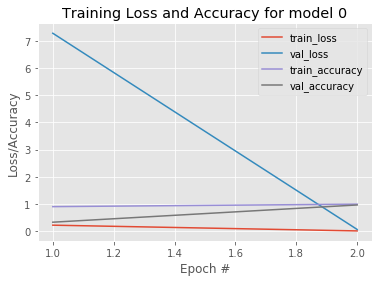

In [13]:
# plot the training loss and accuracy
i=0

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(1, nb_epoch+1), H.history["loss"],label="train_loss")
plt.plot(np.arange(1, nb_epoch+1), H.history["val_loss"],label="val_loss")
plt.plot(np.arange(1, nb_epoch+1), H.history["accuracy"],label="train_accuracy")
plt.plot(np.arange(1, nb_epoch+1), H.history["val_accuracy"],label="val_accuracy")
plt.title("Training Loss and Accuracy for model {}".format(i))
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('fig.png')
plt.show()
plt.close()

In [14]:
# load model

model=load_model('color_model_final2.h5')



In [15]:

# Prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`.

def plot_confusion_matrix(cm, classes, normalize=False, see_error=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims=True)
        if see_error:
            np.fill_diagonal(cm, 0)
            title = "Error Analysis"
        else:
            title = "Normalized confusion matrix"
    else:
        title = "Confusion matrix, no normalization"
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.grid(None)

    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, labelNames)
    plt.yticks(tick_marks, labelNames)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Classification report
                 precision    recall  f1-score   support

  general_waste       1.00      1.00      1.00        10
     green_sack       1.00      0.90      0.95        10
mixed_recycling       0.91      1.00      0.95        10

    avg / total       0.97      0.97      0.97        30

Confusion Matrix
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


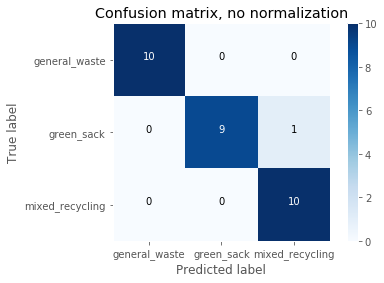

In [16]:
# classification report and confusion matrix for test data

testX = testX.astype("float") / 255.0

#print(testX)

predictions = model.predict(testX, batch_size=1)

print('Classification report')
report = classification_report(testy.argmax(axis=1),predictions.argmax(axis=1), target_names=labelNames)
print(report)

print('Confusion Matrix')
cm=confusion_matrix(testy.argmax(axis=1), predictions.argmax(axis=1))
print(cm)

plot_confusion_matrix(cm, classes, normalize=False, see_error=False, cmap=plt.cm.Blues)



In [17]:
# Evaluate model on unseen data
# create evaluation data

evalX=np.zeros((1,227,227,3))
evaly=[]

paths=glob.glob(os.path.join('eval/general_waste','*.jpg'))


for path in paths:
        print(path)
        im=cv2.resize (cv2.imread(path), (227,227)).astype(np.float32) 
        im=im.reshape(1, 227, 227, 3)
        evalX=np.vstack((evalX, im))
        evaly.append(0)


print(str(evalX.shape))

evalX = np.delete(evalX, 0, axis=0)
print(str(evalX.shape))


paths=glob.glob(os.path.join('eval/green_sack','*.jpg'))


for path in paths:
        print(path)
        im=cv2.resize (cv2.imread(path), (227,227)).astype(np.float32)  
        im=im.reshape(1, 227, 227, 3)
        evalX=np.vstack((evalX, im))
        evaly.append(1)

print(str(evalX.shape))


paths=glob.glob(os.path.join('eval/mixed_recycling','*.jpg'))


for path in paths:
        print(path)
        im=cv2.resize (cv2.imread(path), (227,227)).astype(np.float32)  
        im=im.reshape(1, 227, 227, 3)
        evalX=np.vstack((evalX, im))
        evaly.append(2)


print(str(evalX.shape))

evaly = np.array(evaly)
evaly = np.expand_dims(evaly, axis=1)

print(str(evaly.shape)) 

evalX = evalX.astype("float") / 255.0

#print(evalX)

# convert the labels from integers to vectors
lb = LabelBinarizer()
evaly = lb.fit_transform(evaly)









eval/general_waste\10.jpg
eval/general_waste\11.jpg
eval/general_waste\13.jpg
eval/general_waste\14.jpg
eval/general_waste\15.jpg
eval/general_waste\16.jpg
eval/general_waste\17.jpg
eval/general_waste\7.jpg
eval/general_waste\8.jpg
eval/general_waste\9.jpg
(11, 227, 227, 3)
(10, 227, 227, 3)
eval/green_sack\10.jpg
eval/green_sack\11.jpg
eval/green_sack\13.jpg
eval/green_sack\14.jpg
eval/green_sack\15.jpg
eval/green_sack\16.jpg
eval/green_sack\17.jpg
eval/green_sack\7.jpg
eval/green_sack\8.jpg
eval/green_sack\9.jpg
(20, 227, 227, 3)
eval/mixed_recycling\10.jpg
eval/mixed_recycling\11.jpg
eval/mixed_recycling\13.jpg
eval/mixed_recycling\14.jpg
eval/mixed_recycling\15.jpg
eval/mixed_recycling\16.jpg
eval/mixed_recycling\17.jpg
eval/mixed_recycling\7.jpg
eval/mixed_recycling\8.jpg
eval/mixed_recycling\9.jpg
(30, 227, 227, 3)
(30, 1)


Classification report
                 precision    recall  f1-score   support

  general_waste       1.00      1.00      1.00        10
     green_sack       1.00      1.00      1.00        10
mixed_recycling       1.00      1.00      1.00        10

    avg / total       1.00      1.00      1.00        30

Confusion Matrix
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


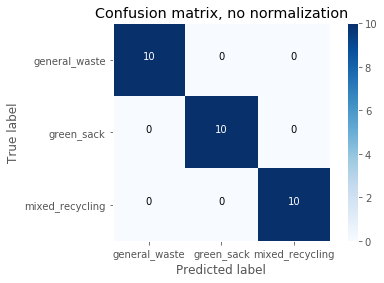

In [18]:
# classification report and confusion matrix for evaluation (unseen) data


predictions = model.predict(evalX, batch_size=1)


print('Classification report')
report = classification_report(evaly.argmax(axis=1),predictions.argmax(axis=1), target_names=labelNames)
print(report)

print('Confusion Matrix')

cm=confusion_matrix(evaly.argmax(axis=1), predictions.argmax(axis=1))
print(cm)

plot_confusion_matrix(cm, classes, normalize=False, see_error=False, cmap=plt.cm.Blues)
